<h1>Project overview</h1>
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. There are four datasets:

1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

<h1>Import Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

<h1>Dataset</h1>

In [2]:
# read dataset
df = pd.read_csv('/Users/agilh/Downloads/bank-additional-full.csv', sep=';')


# menampilkan dataset
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<h1>Preprocessing</h1>

<h2>Mengecek Missing Value</h2>

In [4]:
# melihat jumlah missing value yang ada pada setiap kolom
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# menampilkan 50 data teratas untuk melihat unstandard missing value
df.head(50)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# manampilkan jumlah unstandard missing value 'unknown'
missing_values = ['unknown']
df = pd.read_csv('/Users/agilh/Downloads/bank-additional-full.csv', sep=';', na_values=missing_values)

In [7]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [8]:
# menampilkan 50 data teratas
df.head(50)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<h2>Handling Missing Value</h2>

In [9]:
# mengganti value unstandard missing value 'unknown' manjadi NaN
df.replace(['unknown'], np.nan, inplace=True)

In [10]:
# melihat kembali jumlah unstandard missing value 'unknown'
df[
    df=='unknown'
].count().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [11]:
# menampilkan 50 data teratas
df.head(50)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
# Mengganti missing value di kolom numerikal dengan mean
numerical_columns = list(df.select_dtypes(include=['int64', 'float64']).columns.values)
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Mengganti missing value di kolom kategorikal dengan median
categorical_columns = list(df.select_dtypes(include=['object']).columns.values)
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [13]:
# menampilkan 50 data teratas untuk memastikan tidak ada lagi missing value
df.head(50)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
# manampilkan jumlah missing value
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<h1>Analisis Data Dengan Visualisasi</h1>

1. Berapa total hasil seseorang tertarik untuk Subscribe Deposito?

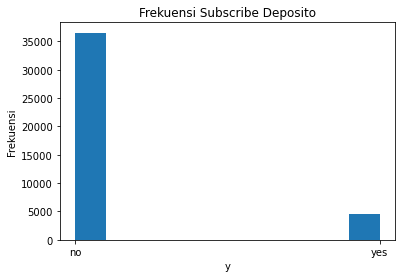

In [15]:
# Plot histogram of y (subscribe deposito)
plt.hist(df["y"])
plt.xlabel("y")
plt.ylabel("Frekuensi")
plt.title("Frekuensi Subscribe Deposito")
plt.show()

Dilihat dari visualisasi diatas menunjukkan bahwa kebanyakan orang tidak tertarik untuk melakukan subscribe deposito

2. Bagaimana persentase pelanggan yang berlangganan deposito berdasarkan kategori usia?

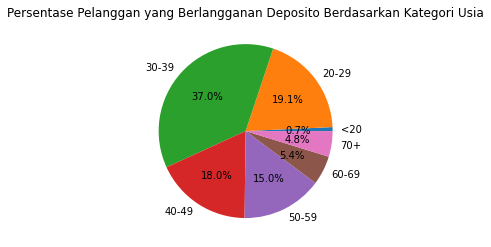

In [16]:
# Membuat bins untuk kategori usia
bins = [0, 19, 29, 39, 49, 59, 69, 120]
labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]

# Menghitung jumlah pelanggan yang berlangganan deposito berdasarkan kategori usia
grouped = df[df["y"] == "yes"].groupby(pd.cut(df["age"], bins=bins, labels=labels, include_lowest=True))["y"].count()

# Membuat pie chart
plt.pie(grouped, labels=grouped.index, autopct="%1.1f%%")
plt.title("Persentase Pelanggan yang Berlangganan Deposito Berdasarkan Kategori Usia")
plt.show()

Hasil yang didapatkan dari visualisasi diatas adalah persentase pelanggan yang melakukan langganan deposito paling banyak di terjadi di kategori usia 30-39 dengan persentase 37% disusul oleh kategori usia 40-49 dengan persentase 18%

<h1>Preprocessing Dataset sebelum Modelling</h1>

<h2>Encoding Variabel Kategorikal</h2>

In [17]:
# List kolom yang di encoder
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Buat objek encoder
encoder = OneHotEncoder()

# Fit dan transform data
encoded_data = encoder.fit_transform(df[columns_to_encode]).toarray()

# Buat dataframe baru dengan data yang sudah di-encode
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Gabungkan data set awal dengan data yang sudah di-encode
df_encoded = pd.concat([df, encoded_df], axis=1)

# Hapus kolom-kolom yang sudah di-encode
df_encoded = df_encoded.drop(columns_to_encode, axis=1)

<h2>Scalling Variabel Numerikal</h2>

In [18]:
# list kolom yang akan di scaling
columns_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# inisiasi MinMaxScaler
scaler = MinMaxScaler()

# lakukan fit transform pada data numerik yang telah di-encode
df[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

<h1>Modeling</h1>

In [19]:
# definisikan fitur X dan target y
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# bagi data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# buat objek untuk masing-masing algoritma
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()

# latih model pada training set
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)

# prediksi target pada testing set
y_pred_logreg = logreg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_nb = nb.predict(X_test)

# hitung akurasi masing-masing model
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_nb = accuracy_score(y_test, y_pred_nb)

# tampilkan akurasi masing-masing model
print('Akurasi Logistic Regression:', acc_logreg)
print('Akurasi KNN:', acc_knn)
print('Akurasi SVM:', acc_svm)
print('Akurasi Decision Tree:', acc_dt)
print('Akurasi Random Forest:', acc_rf)
print('Akurasi Naive Bayes:', acc_nb)

Akurasi Logistic Regression: 0.9095654285020636
Akurasi KNN: 0.9016751638747269
Akurasi SVM: 0.8945132313668366
Akurasi Decision Tree: 0.8866229667394999
Akurasi Random Forest: 0.9101723719349356
Akurasi Naive Bayes: 0.8630735615440641


Analisis :
Model Random Forest tampil memberikan rata-rata akurasi tinggi

In [20]:
# hitung confusion matrix dari masing-masing model
cm_rf = confusion_matrix(y_test, y_pred_rf)

# tampilkan akurasi model
print('Akurasi Random Forest:', acc_rf)

# tampilkan confusion matrix
print('Confusion Matrix Random Forest:')
print(cm_rf)

# hasil klasifikasi
print(metrics.classification_report(y_test,y_pred_rf))

Akurasi Random Forest: 0.9101723719349356
Confusion Matrix Random Forest:
[[7063  240]
 [ 500  435]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.64      0.47      0.54       935

    accuracy                           0.91      8238
   macro avg       0.79      0.72      0.75      8238
weighted avg       0.90      0.91      0.90      8238



Untuk proses klasifikasi saya memilih menggunakan algoritma Random Forest karena performa yang dihasilkan lebih baik dari yang algoritma yang lain seperti Logistic Regression dan KNN. Hasil classification diatas dapat dilihat menghasilkan accuracy sebesar 0.91.